# قسمت اول پروژه (مقایسه مصرف روز های تعطیل و غیر تعطیل)

### امیرحسین صفری
### امیرحسین صداقت نیا
### مصطفی درویشانی
### عادل موسویان

In [103]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


      #  Import zone

In [104]:
import pandas as pd

In [105]:
df = pd.read_csv("/content/report.csv")
df.head()

,date,d,date_num,freq_avg,h,m,n_days,p,p_industries,p_lastyear,...,p_reserve,r,time,y,weekday_fa,holiday_inCal,date_gr,weekday_en,holiday_inCal_tomorrow,holiday_inCal_yesterday
0,1396/01/13,13,1396.036,50.00,13,1,13,21640.0,3653,NaN,...,3711,3464,13:46,1396,یکشنبه,1.0,2017-04-02,Sunday,0.0,NaN
1,1396/01/14,14,1396.038,50.01,12,1,14,29820.0,3932,NaN,...,1293,3462,12:44,1396,دوشنبه,0.0,2017-04-03,Monday,0.0,1.0
2,1396/01/15,15,1396.041,50.01,12,1,15,30303.0,4067,NaN,...,1927,3460,12:26,1396,سه شنبه,0.0,2017-04-04,Tuesday,0.0,0.0
3,1396/01/16,16,1396.044,50.00,12,1,16,29809.0,3892,NaN,...,2701,3458,12:13,1396,چهارشنبه,0.0,2017-04-05,Wednesday,0.5,0.0
4,1396/01/17,17,1396.046,50.00,11,1,17,29546.0,4083,NaN,...,2407,3456,11:34,1396,پنجشنبه,0.5,2017-04-06,Thursday,0.0,0.0


>      # Q1


Linear interpolation formula

565bf8867a5246765be9e500c85e97b02497e544.svg

344b32a8a26cd114f8de0eba22afb2dd67f90b67.svg




In [106]:
def linear_interpolation(firstpx, firstpy, secondpx, secondpy, targetx):
  ''' Implementation of linear interpolation '''
  targety = firstpy * (1 - (secondpx - targetx)/(secondpx - firstpx)) + secondpy * (1 - (targetx - firstpx)/(secondpx - firstpx))
  return targety

def next_not_holiday(df, dayoff_index):
  ''' Returns first next working day '''
  counter = 1
  while 1:
    next = df.iloc[[dayoff_index + counter]]
    if next["holiday_inCal"].item() != 1 and next["holiday_inCal"].item() != 0.5:
      next_working_day = dayoff_index + counter
      return next_working_day
    counter += 1

def previous_not_holiday(df, dayoff_index):
  ''' Returns first previous working day '''
  counter = 1
  while 1:
    next = df.iloc[[dayoff_index - counter]]
    if next["holiday_inCal"].item() != 1 and next["holiday_inCal"].item() != 0.5:
      next_working_day = dayoff_index - counter
      return next_working_day
    counter += 1

In [107]:
df.iloc[[0]]

,date,d,date_num,freq_avg,h,m,n_days,p,p_industries,p_lastyear,...,p_reserve,r,time,y,weekday_fa,holiday_inCal,date_gr,weekday_en,holiday_inCal_tomorrow,holiday_inCal_yesterday
0,1396/01/13,13,1396.036,50.0,13,1,13,21640.0,3653,NaN,...,3711,3464,13:46,1396,یکشنبه,1.0,2017-04-02,Sunday,0.0,NaN


In [108]:
# Q1: linear interpolation of holidays
p_holiday_interpolated = []

# First and last days are holidays so we gonna calculate it later
for i in range(1, len(df)-1):
  day = df.iloc[[i]]
  interpolated_p_day = 0
  if day["holiday_inCal"].item() != 0:
    yesterday = previous_not_holiday(df, i)
    tommorow  = next_not_holiday(df, i)
    
    p_yesterday = df.iloc[[yesterday]]["p"]
    p_tommorow = df.iloc[[tommorow]]["p"]

    interpolated_p_day = linear_interpolation(yesterday, p_yesterday.item(), tommorow, p_tommorow.item(), i)

  p_holiday_interpolated.append(interpolated_p_day)

# if first day is a holiday
if df.iloc[[0]]["holiday_inCal"].item() != 0 :
  tommorow  = next_not_holiday(df, 0)
  day_after_tommorow = next_not_holiday(df, tommorow)

  p_tommorow = df.iloc[[tommorow]]["p"]
  p_day_after_tommorow = df.iloc[[day_after_tommorow]]["p"]

  interpolated_p_day = linear_interpolation(tommorow, p_tommorow.item(), day_after_tommorow, p_day_after_tommorow.item(), 0)
  p_holiday_interpolated.insert(0, interpolated_p_day)

# if last day is a holiday
if df.iloc[[len(df)-1]]["holiday_inCal"].item() != 0 :
  yesterday = previous_not_holiday(df, len(df)-1)
  day_before_yesterday = previous_not_holiday(df, yesterday)

  p_yesterday = df.iloc[[yesterday]]["p"]
  p_day_before_yesterday = df.iloc[[day_before_yesterday]]["p"]

  interpolated_p_day = linear_interpolation(yesterday, p_yesterday.item(), day_before_yesterday, p_day_before_yesterday.item(), len(df)-1)
  p_holiday_interpolated.append(interpolated_p_day)

df["p_holiday_interpolated"] = p_holiday_interpolated

In [109]:
# Q1: working days
p_working_interpolated = []

for i in range(len(df)):
  day = df.iloc[[i]]
  if day["holiday_inCal"].item() == 0:
    p_working_interpolated.append(day["p"].item())
  else:
    p_working_interpolated.append(0)

df["p_working_interpolated"] = p_working_interpolated

In [110]:
df.head()

,date,d,date_num,freq_avg,h,m,n_days,p,p_industries,p_lastyear,...,time,y,weekday_fa,holiday_inCal,date_gr,weekday_en,holiday_inCal_tomorrow,holiday_inCal_yesterday,p_holiday_interpolated,p_working_interpolated
0,1396/01/13,13,1396.036,50.00,13,1,13,21640.0,3653,NaN,...,13:46,1396,یکشنبه,1.0,2017-04-02,Sunday,0.0,NaN,30786.0,0.0
1,1396/01/14,14,1396.038,50.01,12,1,14,29820.0,3932,NaN,...,12:44,1396,دوشنبه,0.0,2017-04-03,Monday,0.0,1.0,0.0,29820.0
2,1396/01/15,15,1396.041,50.01,12,1,15,30303.0,4067,NaN,...,12:26,1396,سه شنبه,0.0,2017-04-04,Tuesday,0.0,0.0,0.0,30303.0
3,1396/01/16,16,1396.044,50.00,12,1,16,29809.0,3892,NaN,...,12:13,1396,چهارشنبه,0.0,2017-04-05,Wednesday,0.5,0.0,0.0,29809.0
4,1396/01/17,17,1396.046,50.00,11,1,17,29546.0,4083,NaN,...,11:34,1396,پنجشنبه,0.5,2017-04-06,Thursday,0.0,0.0,30751.0,0.0


>      # Q2

In [111]:
# grouping the days by month and calculating mean of holiday interpolated p
dfm = df.groupby(pd.PeriodIndex(df['date_gr'], freq="M"))['p_holiday_interpolated'].mean()
dfm = dfm.to_frame()
dfm.reset_index(inplace=True)

In [112]:
dfm.head()

,date_gr,p_holiday_interpolated
0,2017-04,12922.000000
1,2017-05,9927.916667
2,2017-06,23434.965517
3,2017-07,13673.935484
4,2017-08,15334.892473


In [113]:
# same as above but for interpolated working p
temp_df = df.groupby(pd.PeriodIndex(df['date_gr'], freq="M"))['p_working_interpolated'].mean()
temp_df = temp_df.to_frame()
temp_df.reset_index(inplace=True)

In [114]:
temp_df.head()

,date_gr,p_working_interpolated
0,2017-04,21676.333333
1,2017-05,32297.466667
2,2017-06,25323.551724
3,2017-07,39418.129032
4,2017-08,37529.451613


In [115]:
# merging two DFs by date_gr
dfm = dfm.merge(temp_df, on="date_gr")
dfm.head()

,date_gr,p_holiday_interpolated,p_working_interpolated
0,2017-04,12922.000000,21676.333333
1,2017-05,9927.916667,32297.466667
2,2017-06,23434.965517,25323.551724
3,2017-07,13673.935484,39418.129032
4,2017-08,15334.892473,37529.451613


>      # Q3

In [116]:
def p_mean_month_year_dfm(dfm, month, year):
  ''' Returns mean of target year and month from dfm '''
  for i in range(len(dfm)):
    day = dfm.iloc[[i]]
    date = day['date_gr'].item()
    date = str(date)
    date = date.split("-")
    year_dfm = int(date[0])
    month_dfm = int(date[1])
    if year_dfm == int(year) and month_dfm == int(month):
      index = i
      return index

In [117]:
# calculating p difference of working interpolated p and p of working day
p_difference = []

for i in range(len(df)):
  day = df.iloc[[i]]
  if day["holiday_inCal"].item() != 0:
    p_difference.append(0)
    continue
  date = day["date_gr"].item()
  date = date.split("-")
  year = int(date[0])
  month = int(date[1])

  index = p_mean_month_year_dfm(dfm, month, year)
  mean_of_month = dfm.iloc[[index]]['p_working_interpolated'].item()

  difference = mean_of_month - day["p"].item()
  p_difference.append(difference)

df["p_difference"] = p_difference

In [118]:
df.head(10)

,date,d,date_num,freq_avg,h,m,n_days,p,p_industries,p_lastyear,...,y,weekday_fa,holiday_inCal,date_gr,weekday_en,holiday_inCal_tomorrow,holiday_inCal_yesterday,p_holiday_interpolated,p_working_interpolated,p_difference
0,1396/01/13,13,1396.036,50.00,13,1,13,21640.0,3653,NaN,...,1396,یکشنبه,1.0,2017-04-02,Sunday,0.0,NaN,30786.000000,0.0,0.000000
1,1396/01/14,14,1396.038,50.01,12,1,14,29820.0,3932,NaN,...,1396,دوشنبه,0.0,2017-04-03,Monday,0.0,1.0,0.000000,29820.0,-8143.666667
2,1396/01/15,15,1396.041,50.01,12,1,15,30303.0,4067,NaN,...,1396,سه شنبه,0.0,2017-04-04,Tuesday,0.0,0.0,0.000000,30303.0,-8626.666667
3,1396/01/16,16,1396.044,50.00,12,1,16,29809.0,3892,NaN,...,1396,چهارشنبه,0.0,2017-04-05,Wednesday,0.5,0.0,0.000000,29809.0,-8132.666667
4,1396/01/17,17,1396.046,50.00,11,1,17,29546.0,4083,NaN,...,1396,پنجشنبه,0.5,2017-04-06,Thursday,0.0,0.0,30751.000000,0.0,0.000000
5,1396/01/20,20,1396.055,50.01,12,1,20,31693.0,3999,NaN,...,1396,یکشنبه,0.0,2017-04-09,Sunday,0.0,0.5,0.000000,31693.0,-10016.666667
6,1396/01/21,21,1396.057,50.01,12,1,21,32520.0,4177,NaN,...,1396,دوشنبه,0.0,2017-04-10,Monday,1.0,0.0,0.000000,32520.0,-10843.666667
7,1396/01/22,22,1396.060,50.00,12,1,22,31051.0,4229,NaN,...,1396,سه شنبه,1.0,2017-04-11,Tuesday,0.0,0.0,33618.000000,0.0,0.000000
8,1396/01/23,23,1396.063,50.01,14,1,23,34716.0,4234,NaN,...,1396,چهارشنبه,0.0,2017-04-12,Wednesday,0.5,1.0,0.000000,34716.0,-13039.666667
9,1396/01/24,24,1396.066,50.01,12,1,24,34693.0,4493,NaN,...,1396,پنجشنبه,0.5,2017-04-13,Thursday,1.0,0.0,35889.333333,0.0,0.000000


>      # Q4

In [119]:
mordad_working = []
mordad_holiday = []

for i in range(len(df)):
  day = df.iloc[[i]]
  date = day["date"].item()
  date_list = date.split("/")

  year = int(date_list[0])
  month = int(date_list[1])

  if year == 1400 and month == 5:

    if day['holiday_inCal'].item() == 0:
      # working
      mordad_working.append(day['p'].item())
    
    else:
      # holiday
      mordad_holiday.append(day['p'].item())

# calculating mean of working days and holidays
mean_of_mordad_working = sum(mordad_working) / len(mordad_working)
mean_of_mordad_holiday = sum(mordad_holiday) / len(mordad_holiday)

industry_usage_mordad = mean_of_mordad_working - mean_of_mordad_holiday

In [120]:
industry_usage_mordad

7146.16190476191

      # Q5

In [121]:
df_working = df.loc[df['holiday_inCal'] == 0]
df_holiday = df.loc[df['holiday_inCal'] != 0]

df_working = df_working.groupby(pd.PeriodIndex(df_working['date_gr'], freq="M"))["p"].mean()
df_working = df_working.to_frame()
df_working.reset_index(inplace=True)

df_holiday = df_holiday.groupby(pd.PeriodIndex(df_holiday['date_gr'], freq="M"))["p"].mean()
df_holiday = df_holiday.to_frame()
df_holiday.reset_index(inplace=True)

In [122]:
df_working.head()

,date_gr,p
0,2017-04,34427.117647
1,2017-05,42127.130435
2,2017-06,48958.866667
3,2017-07,53128.782609
4,2017-08,52882.409091


In [123]:
# calculating industry share of p
industry_p_difference = []
for i in range(len(df_working)):
  industry_mean_month = df_working.iloc[[i]]["p"]
  holiday_mean_month = df_holiday.iloc[[i]]["p"]

  difference = industry_mean_month.item() - holiday_mean_month.item()
  industry_p_difference.append(difference)

dfm["industry_p_difference"] = industry_p_difference

In [124]:
dfm.head()

,date_gr,p_holiday_interpolated,p_working_interpolated,industry_p_difference
0,2017-04,12922.000000,21676.333333,2750.317647
1,2017-05,9927.916667,32297.466667,2604.701863
2,2017-06,23434.965517,25323.551724,4346.795238
3,2017-07,13673.935484,39418.129032,4832.282609
4,2017-08,15334.892473,37529.451613,3488.964646


In [125]:
import matplotlib.pyplot as plt

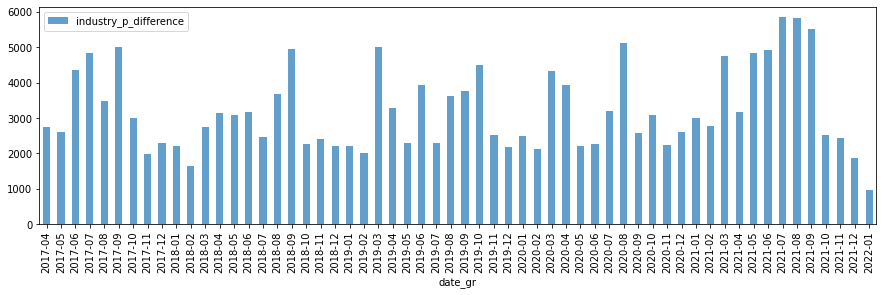

In [126]:
# plotting the industry share versus date gr-month 
dfm.plot.bar(x="date_gr", y="industry_p_difference", alpha=0.7, figsize=(15, 4))
plt.show()

>      # Q6


> part #1

In [127]:
# calculating mean of working days' p for each year
df_working = df.loc[df['holiday_inCal'] == 0]
df_working = df_working.groupby(pd.PeriodIndex(df_working['date_gr'], freq="Y"))["p"].mean()
df_working = df_working.to_frame()
df_working.reset_index(inplace=True)

In [128]:
df_working.head()

,date_gr,p
0,2017,42403.756906
1,2018,38554.795349
2,2019,39127.106599
3,2020,43295.917031
4,2021,47937.209402


In [129]:
# calculating proportion of industry for all days
mean_all_working = df_working["p"].mean()

mean_p_industry = dfm["industry_p_difference"].mean()

industry_propotion = (mean_p_industry / mean_all_working) * 100

In [130]:
print(f"industry_propotion: {industry_propotion:.2f}% \t\t mean_p_industry: {mean_p_industry} \t\t mean_p_all: {mean_all_working}")

industry_propotion: 7.74% 		 mean_p_industry: 3216.2056242667636 		 mean_p_all: 41546.30735161764


>      # Q6


> part #2

In [131]:
# same as above, calculating mean of holidays' p for each year
df_holiday = df.loc[df['holiday_inCal'] != 0]

df_holiday = df_holiday.groupby(pd.PeriodIndex(df_holiday['date_gr'], freq="Y"))["p"].mean()
df_holiday = df_holiday.to_frame()
df_holiday.reset_index(inplace=True)

In [132]:
df_holiday.head()

,date_gr,p
0,2017,39098.360465
1,2018,35674.478632
2,2019,36490.056000
3,2020,39186.696000
4,2021,43236.960630


In [133]:
df_year = df_working.merge(df_holiday, on="date_gr")
df_year.head()

,date_gr,p_x,p_y
0,2017,42403.756906,39098.360465
1,2018,38554.795349,35674.478632
2,2019,39127.106599,36490.056000
3,2020,43295.917031,39186.696000
4,2021,47937.209402,43236.960630


In [134]:
# calculating industries' proportion of p in each year
industry_propotion = ((df_year['p_x'] - df_year['p_y']) / df_year['p_x'])*100
df_year["industry_propotion(%)"] = industry_propotion

In [135]:
df_year.head()

,date_gr,p_x,p_y,industry_propotion(%)
0,2017,42403.756906,39098.360465,7.795056
1,2018,38554.795349,35674.478632,7.470709
2,2019,39127.106599,36490.056000,6.739703
3,2020,43295.917031,39186.696000,9.491013
4,2021,47937.209402,43236.960630,9.805011


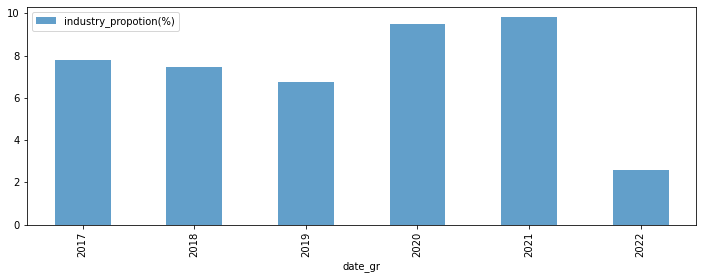

In [137]:
# plotting changes of industries' p propotion in each year
df_year.plot.bar(x="date_gr", y="industry_propotion(%)", alpha=0.7, figsize=(12, 4))
plt.show()